# Fetching of Data

In [1]:
import pandas as pd
A=pd.read_csv("/Users/User/Desktop/Python files/50_Startups.csv")

In [2]:
A.head() #getting of the first 5 rows

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
A.sort_values("RND",ascending=False).head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
A.sort_values("PROFIT",ascending=False).tail()

,RND,ADMIN,MKT,STATE,PROFIT
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
A.info() #identification of number of rows and columns, this can also be specifically found using A.columns and A.shape functions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [6]:
A.columns #name of coulmns 

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')

In [7]:
A.shape #specifies number of rows and columns

(50, 5)

In [8]:
A.describe() #this is to identify values in percentiles,min and max,mean,count and standard deviation

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
A.isna().sum() 

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [10]:
A.corr() #checking the correllation between variables

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


In [11]:
def catcon(A):
    cat=[]
    con=[]
    for i in A.columns:
        if A[i].dtypes == "object":
            cat.append(i)
        else:
            con.append(i)
    return cat,con

In [12]:
cat,con = catcon(A)
cat
con

['RND', 'ADMIN', 'MKT', 'PROFIT']

In [13]:
cat

['STATE']

In [14]:
con

['RND', 'ADMIN', 'MKT', 'PROFIT']

# Defining of X and Y

In [15]:
X=A[["RND","MKT"]] #Predictors
Y=A[["PROFIT"]] #Predicted

In [16]:
X.head(2)

,RND,MKT
0,165349.2,471784.10
1,162597.7,443898.53


In [17]:
Y.head(2)

,PROFIT
0,192261.83
1,191792.06


In [18]:
Y.skew()

PROFIT    0.023291
dtype: float64

# creating of model 

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

In [21]:
model.coef_[0][0]

0.8058566477808699

In [22]:
b0 = model.intercept_[0]
b1 = model.coef_[0][0]

In [23]:
from sklearn.metrics import mean_absolute_error
mba = mean_absolute_error(ytest,pred_ts)
mba


5837.753639157061

In [24]:
from sklearn.metrics import r2_score
r2_score(ytest,pred_ts)

0.9564046962656636

In [25]:
r2_score(ytrain,pred_tr)

0.9430746259219165

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RND', ylabel='PROFIT'>

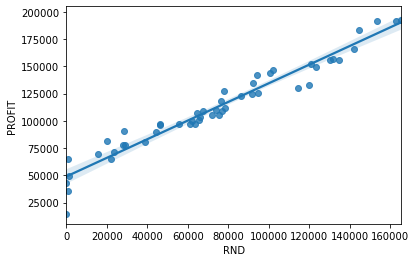

In [26]:
from seaborn import regplot
regplot(X.RND,Y.PROFIT)